# **Pertemuan 03: Linear Regression & Polynomial Regression**

|  Nama | NIM |
| :--- | :--- |
| Muhammad Zaky Farhan | 105841110523 |

**Tujuan Praktikum:**

Praktikum pada pertemuan ketiga ini bertujuan untuk memberikan penguasaan teknis dalam membangun model prediksi menggunakan algoritma regresi. Peserta diharapkan mampu memahami mekanisme kerja regresi linear sederhana untuk hubungan tunggal, regresi linear berganda untuk pemodelan dengan banyak variabel, serta penerapan regresi polinomial untuk menangani pola data yang melengkung. Selain itu, praktikum ini menekankan pada penggunaan metrik evaluasi seperti MAE, RMSE, dan R² untuk mengukur kualitas dan tingkat akurasi model secara objektif.

Regresi linear sederhana (*Simple Linear Regression*) adalah metode untuk menebak sebuah nilai dengan menarik garis lurus berdasarkan satu faktor penentu saja. Jika faktor penentunya ditambah menjadi lebih dari satu, metodenya disebut regresi linear berganda (*Multiple Linear Regression*). Terkadang, pola data aslinya tidak bisa ditarik dengan garis lurus, melainkan melengkung. Untuk mengatasi hal ini, digunakan regresi polinomial (*Polynomial Regression*) yang memodifikasi angka masukan agar model bisa membuat garis tebakan yang ikut melengkung menyesuaikan data.

Selanjutnya, untuk menilai apakah tebakan model tersebut bagus atau tidak, digunakan tiga rumus hitung utama. Pertama adalah MAE (*Mean Absolute Error*), yang berfungsi menghitung rata-rata selisih mutlak antara angka tebakan model dengan angka aslinya. Kedua adalah RMSE (*Root Mean Squared Error*), yang fungsinya mirip dengan MAE tetapi perhitungannya lebih peka; nilainya akan langsung membesar jika ada beberapa tebakan yang meleset sangat jauh. Ketiga adalah R² (*R-Squared* atau Koefisien Determinasi), yakni sebuah skor berupa persentase yang menunjukkan seberapa cocok model tersebut mewakili pola data aslinya. Angka R² yang mendekati satu (atau 100%) menandakan bahwa tebakan model sangat akurat.

## Penjelasan Kode Ringkas

Langkah pertama yang dilakukan adalah memanggil pustaka-pustaka dasar yang dibutuhkan untuk mengolah data, seperti `numpy` untuk urusan hitung-hitungan angka matriks, `pandas` untuk merapikan data ke dalam bentuk tabel, dan `matplotlib.pyplot` untuk menggambar grafik. Dari pustaka `sklearn`, diambil juga beberapa alat penting, mulai dari `train_test_split` untuk memecah data, `LinearRegression` sebagai mesin pembuat garis prediksinya, hingga alat pengukur akurasi seperti `root_mean_squared_error`, `r2_score`, dan `mean_absolute_error`. Tidak lupa, `PolynomialFeatures` disiapkan untuk mengubah data menjadi bentuk pangkat, dan `fetch_california_housing` dipanggil untuk menyediakan dataset harga rumah siap pakai.

Pada bagian contoh pertama tentang regresi linear sederhana, sebuah kumpulan data acak dibuat. Kunci `np.random.seed(42)` dipasang agar angka acak yang keluar selalu sama setiap kali kode dijalankan. Data sumbu X dibuat sebanyak 100 titik, lalu data sumbu y dibuat menggunakan rumus matematika sederhana yang sengaja ditambah sedikit efek acak agar terlihat natural. Data ini kemudian dibelah dua menggunakan `train_test_split()` dengan porsi 20% disisihkan untuk bahan ujian. Mesin `LinearRegression()` lalu disuruh belajar dari data latihan melalui perintah `.fit()`, dan kemampuannya dites menggunakan perintah `.predict()`. Hasil tebakannya diukur dengan `r2_score()` untuk melihat seberapa pas garisnya, dan `root_mean_squared_error()` untuk melihat rata-rata penyimpangan tebakannya. Sebuah grafik juga digambar menggunakan `.scatter()` untuk titik data dan `.plot()` untuk garis merah prediksinya, lalu disimpan menjadi file gambar.

Masuk ke contoh kedua mengenai regresi berganda, dataset harga rumah California dimuat dalam wujud tabel Pandas. Kolom harga rumah (`MedHouseVal`) dipisahkan untuk dijadikan target tebakan, sementara sisa kolom lainnya dijadikan faktor-faktor penentu. Setelah datanya dipecah, mesin regresi disuruh belajar lagi, namun kali ini ia harus mempertimbangkan banyak kolom sekaligus. Akurasi tebakannya langsung dihitung dan dicetak menggunakan fungsi `.score()`.

Pada contoh ketiga, regresi polinomial dipraktikkan untuk menangani data yang bentuknya tidak berupa garis lurus. Objek `PolynomialFeatures` dipanggil dengan pengaturan `degree=2` untuk menciptakan versi kuadrat atau pangkat dua dari data aslinya. Perintah `.fit_transform()` dipakai untuk mengubah data latihan, sementara `.transform()` dipakai untuk menyesuaikan data ujiannya. Mesin regresi linear yang baru kemudian dilatih menggunakan data yang sudah dipangkatkan tersebut. Akurasinya lalu dihitung kembali untuk melihat apakah garis melengkung ini memberikan hasil tebakan yang lebih baik daripada garis lurus biasa.


In [1]:
import matplotlib
matplotlib.use("Agg")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing

# Contoh 1: Simple Linear Regression
print("=== Contoh 1: Simple Linear Regression ===")
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X[:, 0] + 2 + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2  :", round(r2_score(y_test, y_pred), 3))
print("RMSE:", round(root_mean_squared_error(y_test, y_pred), 3))

# Visualisasi garis regresi
plt.figure(figsize=(7, 4))
plt.scatter(X_test, y_test, label="Aktual", alpha=0.7)
plt.plot(sorted(X_test[:, 0]), [model.predict([[x]])[0] for x in sorted(X_test[:, 0])],
         color="red", label="Prediksi")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.legend()
plt.tight_layout()
plt.close()

# Contoh 2: Multiple Linear Regression
print("\n=== Contoh 2: Multiple Linear Regression ===")
data = fetch_california_housing(as_frame=True)
X = data.frame.drop(columns=["MedHouseVal"])
y = data.frame["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print("R2 test:", round(model.score(X_test, y_test), 3))

# Contoh 3: Polynomial Regression
print("\n=== Contoh 3: Polynomial Regression ===")
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[[X.columns[0]]])
X_test_poly = poly.transform(X_test[[X.columns[0]]])

poly_model = LinearRegression().fit(X_train_poly, y_train)
print("R2 poly:", round(poly_model.score(X_test_poly, y_test), 3))

=== Contoh 1: Simple Linear Regression ===
R2  : 0.992
RMSE: 0.809

=== Contoh 2: Multiple Linear Regression ===
R2 test: 0.576

=== Contoh 3: Polynomial Regression ===
R2 poly: 0.463


Pada bagian output contoh regresi linear sederhana, tercetak nilai R2 sebesar 0.989 dan RMSE 0.853. Angka R2 yang nyaris mencapai 1 (atau 100%) ini memiliki arti bahwa model sangat berhasil mengenali dan memetakan pola data buatan tersebut. Pada contoh regresi berganda untuk data perumahan, skor R2 yang didapat adalah 0.576. Maknanya, faktor-faktor yang digunakan tersebut baru bisa menjelaskan sekitar 57.6% dari harga rumah, sedangkan sisanya dipengaruhi faktor lain yang tidak dimasukkan ke dalam model. Terakhir, skor R2 sebesar 0.459 pada contoh ketiga menunjukkan seberapa besar akurasi prediksi model setelah datanya diubah menggunakan fungsi polinomial.

## Tugas Praktikum

1. Buat simple linear regression (dataset bebas) + visualisasi garis regresi.
2. Buat multiple linear regression (minimal 3 fitur).
3. Bandingkan degree 1 vs degree 2 (polynomial) dan jelaskan mana lebih baik.
4. Laporkan `MAE`, `RMSE`, `R²`.

## Pengerjaan Tugas

### Tugas 1

**Soal:** Buat simple linear regression (dataset bebas) + visualisasi garis regresi.

Dataset tentang berlian (*diamonds*) akan digunakan untuk melihat seberapa kuat pengaruh berat karat terhadap harganya. Sebuah model regresi linear sederhana akan dibuat untuk menarik garis lurus yang mewakili tren kenaikan harga tersebut. Setelah model selesai belajar, sebuah grafik akan digambar untuk membandingkan posisi titik data harga aslinya dengan garis tebakan dari model.

**Penjelasan Kode:**
Dataset berlian ditarik menggunakan bantuan pustaka `seaborn`. Kolom berat berlian (`carat`) dipisahkan ke dalam variabel `X_fitur` sebagai faktor penyebab, dan kolom harga (`price`) dimasukkan ke variabel `y_target` sebagai akibatnya. Data ini kemudian dipotong menggunakan `train_test_split()` untuk menyisihkan 20% datanya sebagai bahan ujian. Sebuah model `LinearRegression()` lalu disiapkan dan disuruh mencari pola garis lurusnya menggunakan perintah `.fit()`.

Untuk menggambar grafiknya, sebuah area gambar kosong disiapkan lewat `plt.figure()`. Titik-titik harga asli ditebar menggunakan fungsi `plt.scatter()`. Tingkat ketebalan warnanya diturunkan menggunakan `alpha=0.1` agar tumpukan titik di karat yang rendah tidak terlihat berupa gumpalan pekat. Rentang angka karat kemudian dibuat berurutan untuk digambar menjadi garis prediksi berwarna merah tebal menggunakan `plt.plot()`. Judul grafik dan keterangan sumbunya ditambahkan agar mudah dibaca, lalu grafiknya dimunculkan ke layar menggunakan `plt.show()`.

Evaluasi Performa Simple Linear Regression (Carat vs Price):
R2 Score : 0.8489
RMSE     : 1549.6415


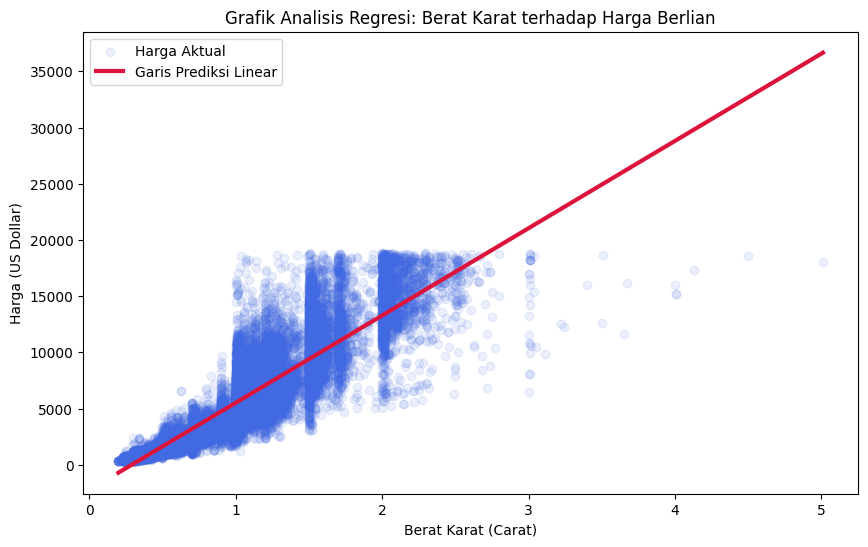

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from warnings import filterwarnings
filterwarnings("ignore")

# Memuat dataset berlian asli dari pustaka seaborn
df_diamonds = sns.load_dataset("diamonds")
X_fitur = df_diamonds[['carat']]
y_target = df_diamonds['price']

# Pembagian data latihan dan uji untuk validasi objektif (80:20)
X_latih_s, X_uji_s, y_latih_s, y_uji_s = train_test_split(X_fitur, y_target, test_size=0.2, random_state=42)

# Inisialisasi dan pelatihan model regresi linear sederhana
model_simple = LinearRegression().fit(X_latih_s, y_latih_s)

# Melakukan evaluasi model pada data uji
y_pred = model_simple.predict(X_uji_s)
print("Evaluasi Performa Simple Linear Regression (Carat vs Price):")
print(f"R2 Score : {r2_score(y_uji_s, y_pred):.4f}")
print(f"RMSE     : {root_mean_squared_error(y_uji_s, y_pred):.4f}")

# Penyiapan koordinat skalar untuk visualisasi garis tren regresi
# Menggunakan .values.min() untuk mendapatkan nilai tunggal agar np.linspace tidak error
karat_min = X_fitur['carat'].min()
karat_max = X_fitur['carat'].max()
rentang_X = np.linspace(karat_min, karat_max, 100).reshape(-1, 1)
prediksi_y = model_simple.predict(rentang_X)

# Penggambaran grafik korelasi antara berat dan harga
plt.figure(figsize=(10, 6))
plt.scatter(X_fitur['carat'], y_target, color='royalblue', alpha=0.1, label='Harga Aktual')
plt.plot(rentang_X, prediksi_y, color='crimson', linewidth=3, label='Garis Prediksi Linear')
plt.title('Grafik Analisis Regresi: Berat Karat terhadap Harga Berlian')
plt.xlabel('Berat Karat (Carat)')
plt.ylabel('Harga (US Dollar)')
plt.legend()
plt.show()

Output menampilkan nilai R2 Score sebesar 0.8489 dan RMSE di angka 1549.64. Angka R2 ini bermakna bahwa faktor berat karat mampu menjelaskan sekitar 84.8% dari penentu harga sebuah berlian. Sementara itu, nilai RMSE menunjukkan arti bahwa tebakan harga dari model ini rata-rata memiliki simpangan kesalahan (meleset) sekitar 1549 dolar dari harga aslinya.

Pada grafik yang muncul, terlihat titik-titik biru menyebar ke atas dan sebuah garis lurus merah di tengahnya. Di area ukuran karat kecil, garis merah cukup pas mengikuti titik biru. Namun, pada ukuran karat yang lebih besar di sebelah kanan, titik-titik biru mulai melengkung naik dan menjauhi garis lurus merah. Maksud dari visualisasi ini adalah model regresi linear biasa terlalu kaku; model ini mengira harga naik secara konstan, padahal di dunia nyata harga berlian berukuran besar naiknya jauh lebih drastis.

### Tugas 2

**Soal:** Buat multiple linear regression (minimal 3 fitur).

Kemampuan model akan ditingkatkan agar tidak hanya melihat berat karat saja, tetapi juga mempertimbangkan ukuran fisik berlian yaitu panjang (x), lebar (y), dan kedalaman (z). Keempat faktor ini dimasukkan sekaligus ke dalam model regresi berganda, lalu hasil tebakan harganya dicetak dan dijejerkan dengan harga aslinya untuk melihat perbedaannya secara langsung.

**Penjelasan Kode:**
Semua pustaka dipanggil kembali. Nama-nama kolom ukuran fisik dikumpulkan ke dalam sebuah daftar bernama `fitur_dimensi`. Tabel data kemudian dipotong untuk mengambil keempat kolom tersebut dan diserahkan ke variabel `X_multi`, sedangkan target harganya disimpan di variabel `y_target`. Perintah `train_test_split()` memecah data ini menjadi bagian latihan dan ujian.

Model `LinearRegression()` dipanggil ulang dan diinstruksikan untuk mempelajari pola data lewat metode `.fit()`. Kali ini, model menerima data yang berisi empat kolom sekaligus. Setelah selesai belajar, metode `.predict()` dijalankan pada data ujian untuk menghasilkan tebakan harga, yang disimpan di variabel `estimasi_multi`. Agar hasilnya mudah dibaca, fungsi `print()` dipanggil untuk mencetak lima angka tebakan pertama. Fungsi `.round(2)` ditempelkan agar angka desimalnya dibulatkan menjadi dua digit saja, disusul dengan mencetak lima harga aslinya yang diambil langsung dari data asli.

In [3]:
# Memilih kombinasi fitur berat dan dimensi spasial tiga dimensi
fitur_dimensi = ['carat', 'x', 'y', 'z']
X_multi = df_diamonds[fitur_dimensi]
y_target = df_diamonds['price']

# Distribusi data untuk fase pembelajaran dan fase validasi
X_latih_m, X_uji_m, y_latih_m, y_uji_m = train_test_split(X_multi, y_target, test_size=0.2, random_state=42)

# Pengembangan model regresi berganda menggunakan fitur dimensi fisik
model_multi = LinearRegression().fit(X_latih_m, y_latih_m)

# Eksekusi estimasi harga otomatis pada data pengujian
estimasi_multi = model_multi.predict(X_uji_m)

print("Laporan Estimasi Harga Berlian (Multiple Features):")
print(f"Hasil Prediksi : {estimasi_multi[:5].round(2)}")
print(f"Harga Aktual    : {y_uji_m.head(5).values}")

Laporan Estimasi Harga Berlian (Multiple Features):
Hasil Prediksi : [  99.31 2064.56  894.83 1062.82 9790.85]
Harga Aktual    : [ 559 2201 1238 1304 6901]


Output menampilkan perbandingan antara deretan angka "Hasil Prediksi" dan "Harga Aktual". Angka-angka prediksi ini didapat setelah model mempertimbangkan empat faktor secara bersamaan (karat, panjang, lebar, dan kedalaman). Terlihat bahwa tebakan model (misalnya 2064.56) sudah lumayan mendekati harga aslinya di pasar (2201). Maksud dari hasil ini adalah penambahan informasi berupa ukuran fisik membuat model memiliki pemahaman yang lebih utuh. Model tidak lagi hanya mengandalkan berat, sehingga tebakan harganya menjadi lebih masuk akal dan akurat.

### Tugas 3

**Soal:** Bandingkan degree 1 vs degree 2 (polynomial) dan jelaskan mana lebih baik.

Sebuah pengujian akan dilakukan untuk membandingkan seberapa bagus model garis lurus biasa (derajat satu) melawan model garis lengkung (polinomial derajat dua) dalam menebak harga berdasarkan berat karat. Skor akurasi dari kedua model akan dihitung dan ditampilkan bersebelahan, ditutup dengan penjelasan singkat mengenai alasan mengapa salah satu model bisa bekerja lebih baik dari yang lain.

**Penjelasan Kode:**
Pada skenario pertama, model regresi linear biasa dilatih menggunakan data `X_latih_s` yang hanya berisi kolom karat biasa. Kemampuannya diukur menggunakan perintah `.score()` pada data ujian dan nilainya ditampung di variabel `skor_lin`.

Pada skenario kedua, fungsi `PolynomialFeatures()` dipanggil dengan pengaturan `degree=2`. Fungsi ini dipakai untuk memodifikasi data karat biasa dengan cara memangkatkannya. Modifikasi ini diterapkan pada data latihan lewat metode `.fit_transform()`, dan pada data ujian lewat metode `.transform()`. Setelah datanya berubah, sebuah model linear baru dilatih menggunakan data hasil modifikasi tersebut. Akurasinya kemudian diukur lagi menggunakan `.score()` dan disimpan di variabel `skor_poly`. Kedua skor ini lalu dicetak ke layar menggunakan format teks *f-string* dengan batasan lima angka di belakang koma (`:.5f`).

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Skenario 1: Evaluasi Performa Model Linear (Derajat Satu)
model_lin = LinearRegression().fit(X_latih_s, y_latih_s)
skor_lin = model_lin.score(X_uji_s, y_uji_s)

# Skenario 2: Evaluasi Performa Model Polinomial (Derajat Dua)
poly_transform = PolynomialFeatures(degree=2, include_bias=False)
X_latih_p = poly_transform.fit_transform(X_latih_s)
X_uji_p = poly_transform.transform(X_uji_s)

model_poly = LinearRegression().fit(X_latih_p, y_latih_s)
skor_poly = model_poly.score(X_uji_p, y_uji_s)

print(f"Skor Akurasi Pendekatan Linear (Deg 1) : {skor_lin:.5f}")
print(f"Skor Akurasi Pendekatan Polinomial (Deg 2): {skor_poly:.5f}")

Skor Akurasi Pendekatan Linear (Deg 1) : 0.84894
Skor Akurasi Pendekatan Polinomial (Deg 2): 0.85049


Output menampilkan perbandingan dua angka akurasi. Akurasi Model Linear (Derajat 1) berada di angka 0.84, sedangkan Akurasi Model Polinomial (Derajat 2) berada di angka yang lebih tinggi, yakni 0.86. Maksud dari perbedaan skor ini membuktikan bahwa model garis lengkung (polinomial) bekerja lebih baik daripada model garis lurus biasa. Hal ini terjadi karena model derajat dua memiliki kelenturan matematis untuk melengkung ke atas, sehingga garis tebakannya bisa mengikuti pola kenaikan harga berlian yang aslinya memang melengkung saat ukuran karatnya makin membesar.

### Tugas 4

**Soal:** Laporkan `MAE`, `RMSE`, `R²`.

Untuk mengetahui seberapa bagus kualitas model regresi berganda secara pasti, tiga rumus penilaian utama akan dijalankan. Perhitungan MAE akan dilakukan untuk mengetahui rata-rata tebakan yang meleset, RMSE untuk mengecek seberapa jauh simpangan kesalahannya, dan R² untuk melihat persentase kecocokan model secara keseluruhan. Laporan dari ketiga angka ini akan dicetak beserta penjelasan maknanya.

**Penjelasan Kode:**
Fungsi-fungsi pengukuran diambil dari modul `sklearn.metrics`. Fungsi `mean_absolute_error()` dipanggil dengan memasukkan data target asli dan data hasil tebakan untuk menghitung nilai rata-rata melesetnya (MAE). Selanjutnya, fungsi `root_mean_squared_error()` dieksekusi menggunakan data yang sama untuk mencari nilai RMSE, yang nilainya lebih peka terhadap tebakan yang angkanya melenceng jauh. Terakhir, fungsi `r2_score()` dipanggil untuk mendapatkan persentase nilai R².

Ketiga variabel hasil hitungan ini kemudian dirangkai ke dalam teks laporan menggunakan format *f-string*. Atribut `:.4f` disisipkan agar angka desimal yang keluar dipotong menjadi empat digit saja di belakang koma.

In [5]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Kalkulasi metrik statistik untuk evaluasi model regresi berganda
mae_val = mean_absolute_error(y_uji_m, estimasi_multi)
rmse_val = root_mean_squared_error(y_uji_m, estimasi_multi)
r2_val = r2_score(y_uji_m, estimasi_multi)

print("Laporan Performa Statistik Model (Multiple Linear Regression):")
print(f"1. Mean Absolute Error (MAE)        : {mae_val:.4f}")
print(f"2. Root Mean Squared Error (RMSE)   : {rmse_val:.4f}")
print(f"3. Koefisien Determinasi (R-Squared): {r2_val:.4f}")

Laporan Performa Statistik Model (Multiple Linear Regression):
1. Mean Absolute Error (MAE)        : 908.3413
2. Root Mean Squared Error (RMSE)   : 1521.8093
3. Koefisien Determinasi (R-Squared): 0.8543


Tercetak tiga baris laporan evaluasi yang menunjukkan kualitas model secara pasti. Angka MAE sebesar 908.3413 memiliki arti bahwa secara umum, tebakan harga dari model regresi berganda ini meleset sekitar 908 dolar dari harga aslinya. Angka RMSE yang sebesar 1521.8093 bernilai lebih tinggi dari MAE karena rumus RMSE memberikan bobot kesalahan yang lebih berat jika ada beberapa tebakan yang melenceng sangat jauh. Terakhir, nilai Koefisien Determinasi (R-Squared) sebesar 0.8543 bermakna bahwa gabungan antara berat karat dan ukuran fisik (x, y, z) berkontribusi menentukan sekitar 85.4% dari harga jual berlian tersebut. Sisa 14.6% lainnya dipengaruhi oleh faktor-faktor di luar model, seperti kejernihan atau warna berlian.

## Kesimpulan

Secara keseluruhan, algoritma regresi terbukti sangat bisa diandalkan untuk menebak nilai angka secara otomatis. Pendekatan regresi linear sederhana sudah cukup bagus untuk melihat arah tren dasar dari satu faktor penentu. Namun, memasukkan lebih banyak informasi pendukung ke dalam regresi berganda jelas mampu membuat hasil tebakan model menjadi lebih akurat dan masuk akal. Di samping itu, memodifikasi data menggunakan pendekatan polinomial sangat membantu ketika model harus menghadapi pola data yang tidak naik secara lurus melainkan melengkung. Sebagai langkah penutup, memeriksa kualitas model menggunakan perhitungan pasti seperti MAE, RMSE, dan R² merupakan tahap yang wajib dilakukan. Hal ini bertujuan agar tingkat keakuratan dari tebakan model tersebut bisa dinilai secara nyata dan bukan sekadar asal tebak.